In [1]:
# (1. todays open - yesterday's close)

# 2. todays high - todays low
# 3. todays close - todays open

# 4. todays close - yesterday's close
# 5. todays open - todays low
# 6. todays open - todays high
# 7. todays close - todays low
# 8. todays close - todays high

# 4. month of year
# 5. week of year
# 6. day of year
# 7. day of month
# 8. day of week
# 9. hour of day (24h cycle)
# 10. Volume (normalized from 0 to 1)


# 11. Rolling window (SMA, EMA)
# 12. Fourier Transform
# 13. Wavelet Transform (discrete wavelet transform (adjust based on volatility: high volatility -> narrow the wavelet, low volatility -> widen the wavelet))
# ?? (Haar, Daubechies, Symlets, Coiflets, Biorthogonal, Reverse Biorthogonal, Discrete Meyer, Gaussian, Mexican Hat, Morlet, Complex Gaussian, Shannon, Frequency B-Spline, Complex Morlet, Generalized Morse, Complex Morlet, Paul, D4, D6, D8, D10, D12, D14, D16, D18, D20, D22, D24, D26, D28, D30, D32, D34, D36, D38, D40, D42, D44, D46, D48, D50, D52, D54, D56, D58, D60, D62, D64, D66, D68, D70, D72, D74, D76, D78, D80, D82, D84, D86, D88, D90, D92, D94, D96, D98, D100, D102, D104, D106, D108, D110, D112, D114, D116, D118, D120, D122, D124, D126, D128, D130, D132, D134, D136, D138, D140, D142, D144, D146, D148, D150, D152, D154, D156, D158, D160, D162, D164, D166, D168, D170, D172, D174, D176, D178, D180, D182, D184, D186, D188, D190, D192, D194, D196, D198, D200, D202, D204, D206, D208, D210, D212, D214, D216, D218, D220, D222, D224, D226, D228, D230, D232, D234, D236, D238, D240, D242, D244, D246, D248, D250, D252, D254, D256, D258, D260, D262, D264, D266, D268, D270, D272, D274, D276, D278, D280, D282, D284, D286, D288, D290, D292, D294, D)
# 14. Trading indicators (bullish or bearish divergence on the RSI, TD Sequential, Candlestick Patterns)


# Alle percentage price changes zwischen -1 und 1 normalisieren
# Volume normalisieren auf [0,1]


# Mit Github Copilot generiert:
# 14. Autocorrelation
# 15. Partial Autocorrelation
# 16. Cross-correlation
# 17. Cross-partial correlation
# 18. Cross-wavelet correlation
# 19. Cross-spectral density
# 20. Cross-wavelet coherence
# 21. Cross-wavelet phase
# 22. Cross-wavelet amplitude
# 23. Cross-wavelet phase difference
# 24. Cross-wavelet amplitude difference
# 25. Cross-wavelet phase lag
# 26. Cross-wavelet amplitude lag
# 27. Cross-wavelet coherence lag
# 28. Cross-wavelet phase difference lag
# 29. Cross-wavelet amplitude difference lag




## Getting the data

In [2]:
import yfinance as yf
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from configuration import stock_ticker, start_date, end_date

In [3]:
def adjust_to_three_sigma(feature_list):
    percentile_1st = np.percentile(feature_list, 0.3)
    percentile_99th = np.percentile(feature_list, 99.7)
    feature_list_capped = [max(min(x, percentile_99th), percentile_1st) for x in feature_list]
    return feature_list_capped

def adjust_top_one_pct(feature_list):
    percentile_1st = np.percentile(feature_list, 1)
    percentile_99th = np.percentile(feature_list, 99)
    feature_list_capped = [max(min(x, percentile_99th), percentile_1st) for x in feature_list]
    return feature_list_capped

In [4]:
stock_df = yf.download(stock_ticker, start=start_date, end=end_date)
stock_df.head()

[*********************100%%**********************]  1 of 1 completed


,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2009-01-02,22.700001,23.000000,22.520000,22.950001,14.269997,16355800
2009-01-05,22.785000,22.945000,22.590000,22.719999,14.126980,20237200
2009-01-06,22.850000,22.985001,22.230000,22.355000,13.900028,21307800
2009-01-07,22.110001,22.590000,22.110001,22.465000,13.968429,21581000
2009-01-08,22.420000,22.639999,22.280001,22.620001,14.064810,20087000


In [5]:
features_df = pd.DataFrame(index=stock_df.index)
features_df.head()

""
Date
2009-01-02
2009-01-05
2009-01-06
2009-01-07
2009-01-08


## Features

### 1. Today's open minus yesterday's close [%] | (capture price jumps between candles)


In [6]:
# 1. Today's open minus yesterday's close [%]

t_open_y_close = [(stock_df['Open'].iloc[i] - stock_df['Close'].iloc[i-1]) / stock_df['Close'].iloc[i-1] for i in range(1,len(stock_df))]
t_open_y_close = [0] + t_open_y_close
print(t_open_y_close)

[0, -0.007189582136911891, 0.005721878170956704, -0.01095946933131794, -0.002003119340676321, -0.00022109053623730384, -0.0031389998752953184, 0.0016007248012113518, -0.011812822634170623, -0.0011731402701453746, 0.012453895478000212, -0.001368644458991265, 0.012126876045027305, -0.015015049945304169, -0.010899754583674705, 0.002369632045336682, 0.005809900234537843, 0.015462684990359812, -0.003647967286492632, -0.0025258464357894466, -0.011938251911456164, 0.006155263049285002, 0.0006924926017591637, -0.004245290063631667, 0.000937009061000934, -0.005281275459600954, -0.007090594233523119, 0.007130585900758212, 0.03343835843974724, -0.004280212419946356, -0.019384230415030377, 0.0042253594277738985, 0.010074983648105442, -0.007621201435841505, 0.004201687780920975, 0.014967951195802002, -0.00278687279969447, 0.009440678214836877, -0.0026783689108579455, -0.009791866000559177, 0.00302350090033202, 0.01081633142261185, -0.01434683366201052, 0.007926104725286355, 0.009718697773524049, 0.

In [7]:
print(len(stock_df))
print(len(t_open_y_close))

3774
3774


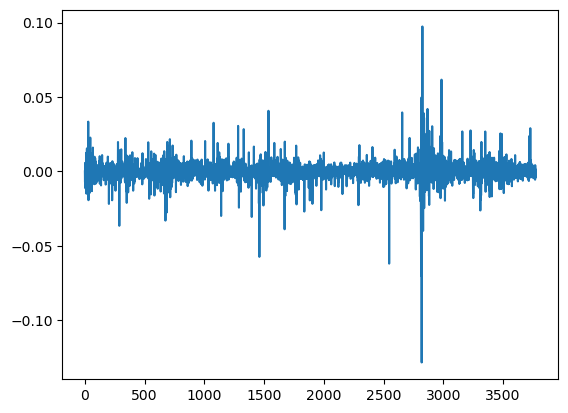

In [8]:
plt.plot(t_open_y_close)

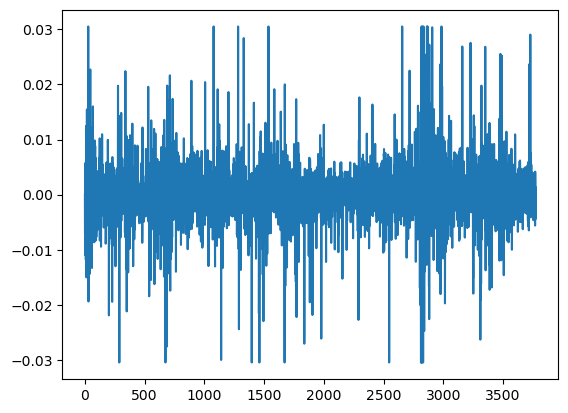

In [9]:
t_open_y_close_adjusted = adjust_to_three_sigma(t_open_y_close)
plt.plot(t_open_y_close_adjusted)

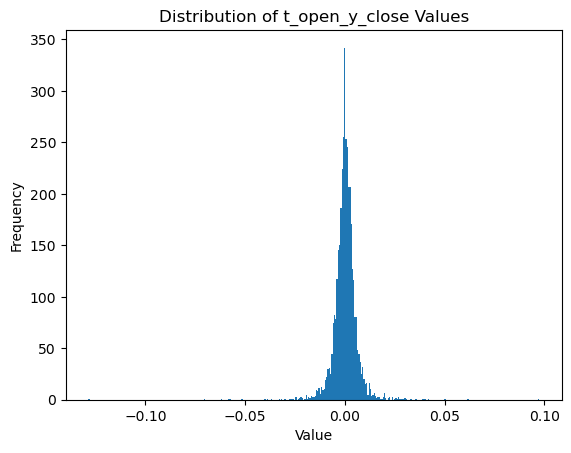

In [10]:
plt.hist(t_open_y_close, bins='auto')
plt.title('Distribution of t_open_y_close Values')
plt.xlabel('Value')
plt.ylabel('Frequency')
plt.show()

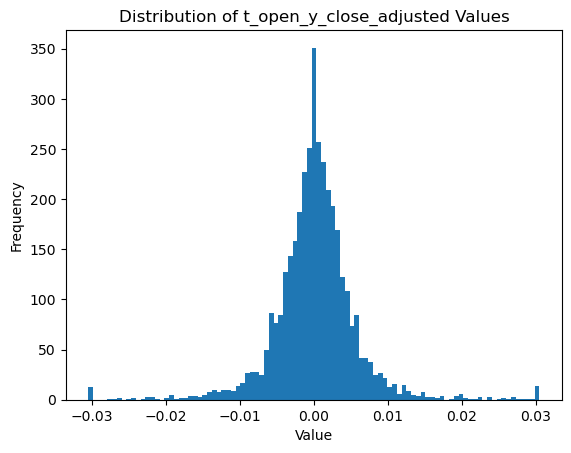

In [11]:
plt.hist(t_open_y_close_adjusted, bins='auto')
plt.title('Distribution of t_open_y_close_adjusted Values')
plt.xlabel('Value')
plt.ylabel('Frequency')
plt.show()

In [12]:
# Add log later
'''
t_open_y_close_log = []
for val in t_open_y_close:
    if val > 0:
        t_open_y_close_log.append(np.log(val))
    elif val == 0:
        t_open_y_close_log.append(0)
    else:
        t_open_y_close_log.append(-np.log(val))
plt.hist(np.log(t_open_y_close_log), bins='auto')
plt.title('Distribution of t_open_y_close_adjusted Values')
plt.xlabel('Value')
plt.ylabel('Frequency')
plt.show()
'''

"\nt_open_y_close_log = []\nfor val in t_open_y_close:\n    if val > 0:\n        t_open_y_close_log.append(np.log(val))\n    elif val == 0:\n        t_open_y_close_log.append(0)\n    else:\n        t_open_y_close_log.append(-np.log(val))\nplt.hist(np.log(t_open_y_close_log), bins='auto')\nplt.title('Distribution of t_open_y_close_adjusted Values')\nplt.xlabel('Value')\nplt.ylabel('Frequency')\nplt.show()\n"

In [13]:
features_df['t_open_y_close'] = t_open_y_close
features_df.head()

,t_open_y_close
Date,
2009-01-02,0.000000
2009-01-05,-0.007190
2009-01-06,0.005722
2009-01-07,-0.010959
2009-01-08,-0.002003


### 2. Today's high minus today's low [%] | (volatility at timestep t)


In [14]:
# 2. Today's high minus today's low [%] | (daily volatility)

t_high_t_low = [(stock_df['High'].iloc[i] - stock_df['Low'].iloc[i]) / stock_df['Low'].iloc[i] for i in range(len(stock_df))]
print(len(stock_df))
print(len(t_high_t_low))

3774
3774


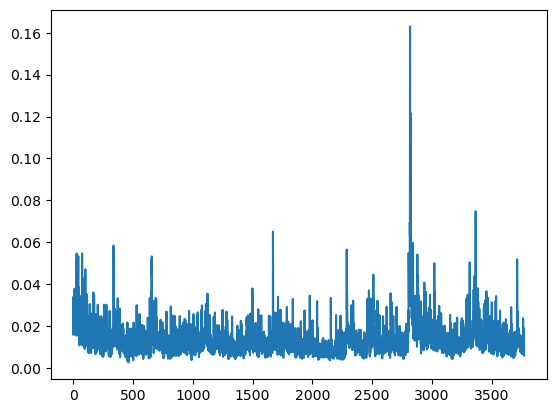

In [15]:
plt.plot(t_high_t_low)

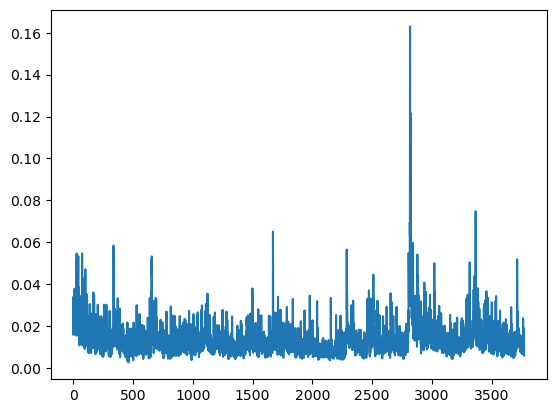

In [16]:
t_high_t_low_adjusted = adjust_to_three_sigma(t_high_t_low)
plt.plot(t_high_t_low)

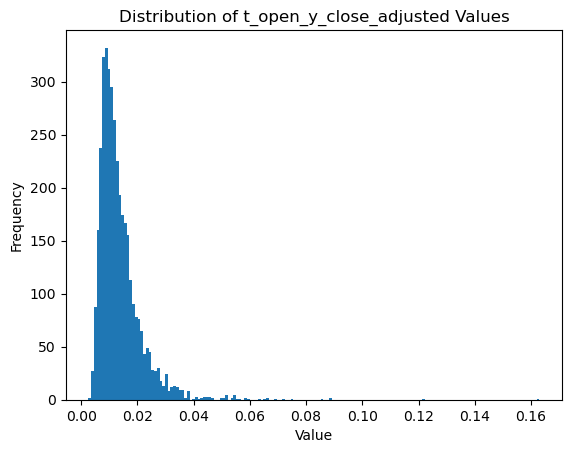

In [17]:
plt.hist(t_high_t_low, bins='auto')
plt.title('Distribution of t_open_y_close_adjusted Values')
plt.xlabel('Value')
plt.ylabel('Frequency')
plt.show()

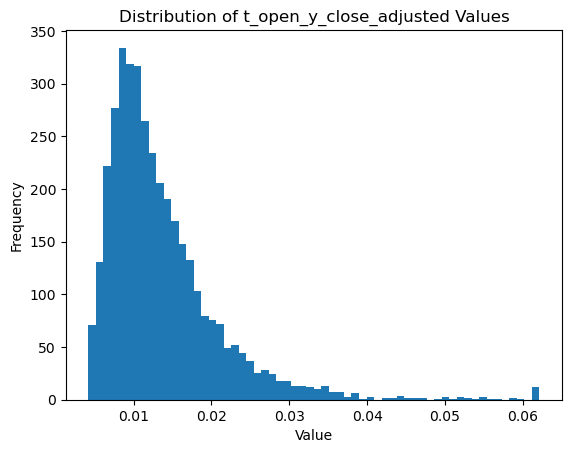

In [18]:
plt.hist(t_high_t_low_adjusted, bins='auto')
plt.title('Distribution of t_open_y_close_adjusted Values')
plt.xlabel('Value')
plt.ylabel('Frequency')
plt.show()

In [19]:
features_df['t_high_t_low'] = t_high_t_low
features_df.head()

,t_open_y_close,t_high_t_low
Date,,
2009-01-02,0.000000,0.021314
2009-01-05,-0.007190,0.015715
2009-01-06,0.005722,0.033963
2009-01-07,-0.010959,0.021710
2009-01-08,-0.002003,0.016158


### 3. Today's close minus today's open [%] | (daily movement)

In [20]:
# 3. Today's close minus today's open [%] | (daily movement)

t_close_t_open = [(stock_df['Close'].iloc[i] - stock_df['Open'].iloc[i]) / stock_df['Open'].iloc[i] for i in range(len(stock_df))]
print(t_close_t_open)
print(" ")
print(len(stock_df))
print(len(features_df))
print(len(t_close_t_open))


[0.011013215488880327, -0.0028527774629324766, -0.021663056059938658, 0.016056062073111062, 0.008920640600306078, -0.013928832069231654, -0.016419243303387187, 0.00502285900765439, -0.020229909611844468, 0.01855769135989433, -0.0013667738315600061, -0.020557280408313776, -0.0025345761862697273, 0.011257025072867518, -0.010551013993901135, 0.01725767270455999, 0.0011553385667314672, -0.0031818043101917615, -0.0034325291363865983, -0.016574526444924208, 0.0007107935239254094, 0.019294110466452206, -0.021914578585494365, 0.011132103088983096, 0.019190257514833175, -0.02331482753112474, -0.03189717224770853, 0.0075683930717794536, 0.04079713485388145, -0.007918603682736294, -0.009302361066951308, -0.0023375053056216405, 0.004407298167918883, -0.003025391306077025, -0.021617859025567426, 0.0079588048425223, -0.01327432960069251, -0.039747503968774606, -0.0026855618361881785, -0.01878868039297511, -0.024616918071593462, 0.012229287700288615, -0.03345253775269325, 0.024901622811148796, -0.018

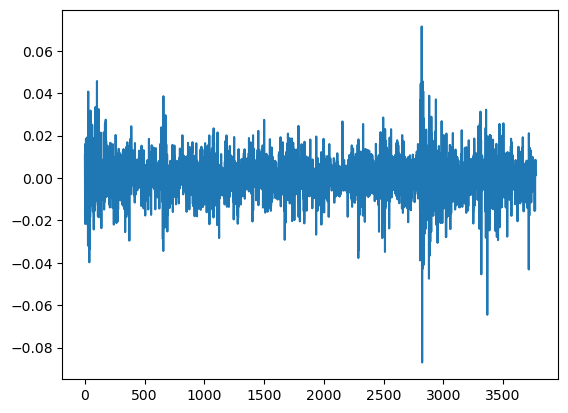

In [21]:
plt.plot(t_close_t_open)

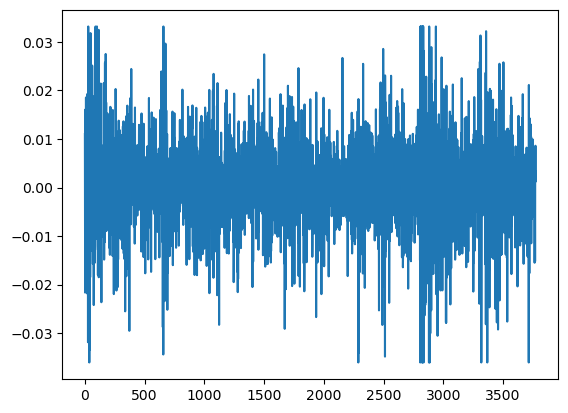

In [22]:
t_close_t_open_adjusted = adjust_to_three_sigma(t_close_t_open)
plt.plot(t_close_t_open_adjusted)

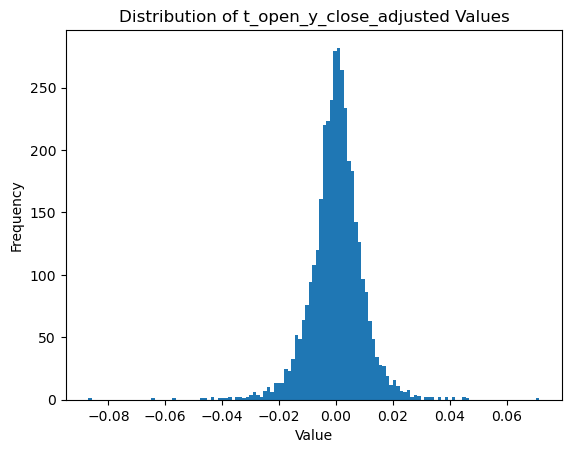

In [23]:
plt.hist(t_close_t_open, bins='auto')
plt.title('Distribution of t_open_y_close_adjusted Values')
plt.xlabel('Value')
plt.ylabel('Frequency')
plt.show()

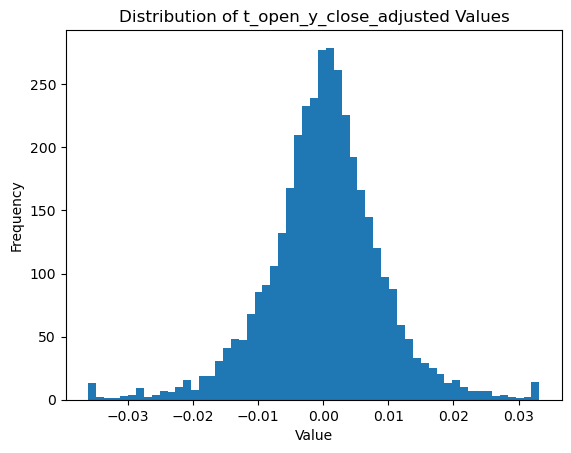

In [24]:
plt.hist(t_close_t_open_adjusted, bins='auto')
plt.title('Distribution of t_open_y_close_adjusted Values')
plt.xlabel('Value')
plt.ylabel('Frequency')
plt.show()

In [25]:
features_df['t_close_t_open'] = t_close_t_open
features_df.head()

,t_open_y_close,t_high_t_low,t_close_t_open
Date,,,
2009-01-02,0.000000,0.021314,0.011013
2009-01-05,-0.007190,0.015715,-0.002853
2009-01-06,0.005722,0.033963,-0.021663
2009-01-07,-0.010959,0.021710,0.016056
2009-01-08,-0.002003,0.016158,0.008921


In [26]:
# 4. Month of year

def month_of_year(month):
    radians = (month - 1) * (np.pi / 6)
    return [np.cos(radians), np.sin(radians)]

features_df['month_of_year'] = features_df.index.month.map(month_of_year)
features_df


,t_open_y_close,t_high_t_low,t_close_t_open,month_of_year
Date,,,,
2009-01-02,0.000000,0.021314,0.011013,"[1.0, 0.0]"
2009-01-05,-0.007190,0.015715,-0.002853,"[1.0, 0.0]"
2009-01-06,0.005722,0.033963,-0.021663,"[1.0, 0.0]"
2009-01-07,-0.010959,0.021710,0.016056,"[1.0, 0.0]"
2009-01-08,-0.002003,0.016158,0.008921,"[1.0, 0.0]"
...,...,...,...,...
2023-12-22,0.002242,0.007584,0.003441,"[0.8660254037844384, -0.5000000000000004]"
2023-12-26,-0.004458,0.011195,0.008612,"[0.8660254037844384, -0.5000000000000004]"
2023-12-27,0.001366,0.006336,0.001194,"[0.8660254037844384, -0.5000000000000004]"


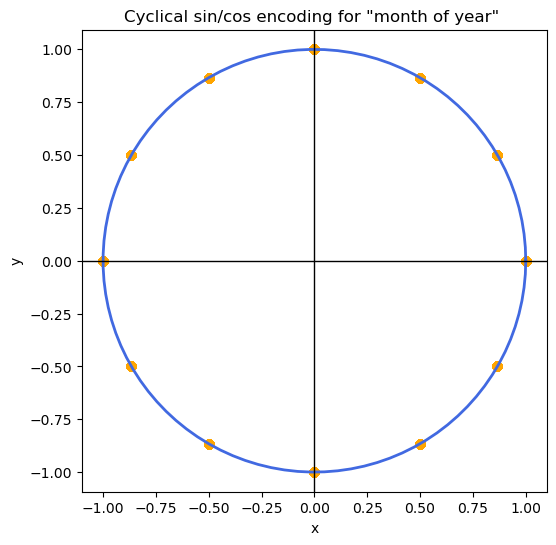

In [27]:
import numpy as np
import matplotlib.pyplot as plt

# Generate a range of angles from 0 to 2pi
angles = np.linspace(0, 2 * np.pi, 100)

# Calculate x and y coordinates of the points on the circle
x = np.cos(angles)
y = np.sin(angles)

# Plot the circle
plt.figure(figsize=(6,6))
plt.plot(x, y, color='royalblue', linewidth=2)

x_coordinates = [val[0] for val in features_df['month_of_year']]
y_coordinates = [val[1] for val in features_df['month_of_year']]
plt.scatter(x_coordinates, y_coordinates, color='orange', marker='o')

# Add horizontal and vertical lines for the axes
plt.axhline(0, color='black', lw=1)
plt.axvline(0, color='black', lw=1)

# Set equal aspect ratio to ensure the circle is not distorted
plt.axis('equal')

# Set the limits of the plot
plt.xlim(-1.1, 1.1)
plt.ylim(-1.1, 1.1)

# Display the plot
plt.title('Cyclical sin/cos encoding for "month of year" ')
plt.xlabel('x')
plt.ylabel('y')
plt.show()

In [28]:
# 5. Week of year

def week_of_year(week):
    radians = (week - 1) * (2 * np.pi / 52)
    return [np.cos(radians), np.sin(radians)]

features_df['week_of_year'] = features_df.index.isocalendar().week.map(week_of_year)
features_df

,t_open_y_close,t_high_t_low,t_close_t_open,month_of_year,week_of_year
Date,,,,,
2009-01-02,0.000000,0.021314,0.011013,"[1.0, 0.0]","[1.0, 0.0]"
2009-01-05,-0.007190,0.015715,-0.002853,"[1.0, 0.0]","[0.992708874098054, 0.12053668025532305]"
2009-01-06,0.005722,0.033963,-0.021663,"[1.0, 0.0]","[0.992708874098054, 0.12053668025532305]"
2009-01-07,-0.010959,0.021710,0.016056,"[1.0, 0.0]","[0.992708874098054, 0.12053668025532305]"
2009-01-08,-0.002003,0.016158,0.008921,"[1.0, 0.0]","[0.992708874098054, 0.12053668025532305]"
...,...,...,...,...,...
2023-12-22,0.002242,0.007584,0.003441,"[0.8660254037844384, -0.5000000000000004]","[0.9709418174260518, -0.23931566428755865]"
2023-12-26,-0.004458,0.011195,0.008612,"[0.8660254037844384, -0.5000000000000004]","[0.992708874098054, -0.12053668025532363]"
2023-12-27,0.001366,0.006336,0.001194,"[0.8660254037844384, -0.5000000000000004]","[0.992708874098054, -0.12053668025532363]"


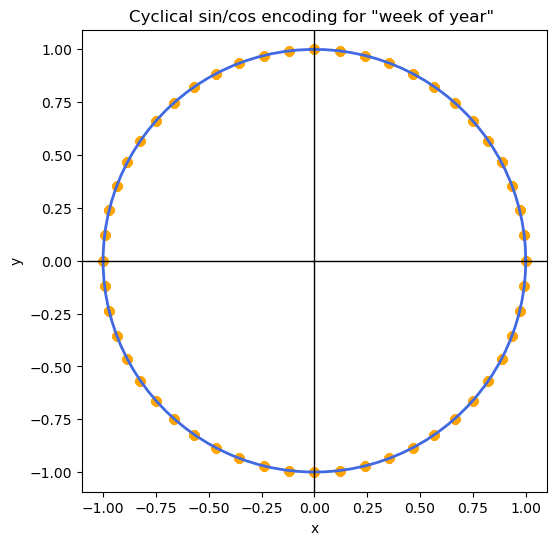

In [29]:
import numpy as np
import matplotlib.pyplot as plt

# Generate a range of angles from 0 to 2pi
angles = np.linspace(0, 2 * np.pi, 100)

# Calculate x and y coordinates of the points on the circle
x = np.cos(angles)
y = np.sin(angles)

# Plot the circle
plt.figure(figsize=(6,6))
plt.plot(x, y, color='royalblue', linewidth=2)

x_coordinates = [val[0] for val in features_df['week_of_year']]
y_coordinates = [val[1] for val in features_df['week_of_year']]
plt.scatter(x_coordinates, y_coordinates, color='orange', marker='o')

# Add horizontal and vertical lines for the axes
plt.axhline(0, color='black', lw=1)
plt.axvline(0, color='black', lw=1)

# Set equal aspect ratio to ensure the circle is not distorted
plt.axis('equal')

# Set the limits of the plot
plt.xlim(-1.1, 1.1)
plt.ylim(-1.1, 1.1)

# Display the plot
plt.title('Cyclical sin/cos encoding for "week of year" ')
plt.xlabel('x')
plt.ylabel('y')
plt.show()

In [30]:
# Test for the week number
'''
test_df = features_df.copy()
test_df['week_number'] = test_df.index.isocalendar().week
test_df
'''

"\ntest_df = features_df.copy()\ntest_df['week_number'] = test_df.index.isocalendar().week\ntest_df\n"

In [31]:
# 6. Day of year - 365.25? Wie mit dem Schaltjahr umgehen?

def day_of_year(day):
    radians = (day - 1) * (2 * np.pi / 365.25)
    return [np.cos(radians), np.sin(radians)]

features_df['day_of_year'] = features_df.index.day.map(day_of_year)
features_df

,t_open_y_close,t_high_t_low,t_close_t_open,month_of_year,week_of_year,day_of_year
Date,,,,,,
2009-01-02,0.000000,0.021314,0.011013,"[1.0, 0.0]","[1.0, 0.0]","[0.9998520419557735, 0.017201575418260506]"
2009-01-05,-0.007190,0.015715,-0.002853,"[1.0, 0.0]","[0.992708874098054, 0.12053668025532305]","[0.9976335468520451, 0.06875540848113941]"
2009-01-06,0.005722,0.033963,-0.021663,"[1.0, 0.0]","[0.992708874098054, 0.12053668025532305]","[0.9963032375991965, 0.08590610426133272]"
2009-01-07,-0.010959,0.021710,0.016056,"[1.0, 0.0]","[0.992708874098054, 0.12053668025532305]","[0.9946781061893646, 0.1030313790431788]"
2009-01-08,-0.002003,0.016158,0.008921,"[1.0, 0.0]","[0.992708874098054, 0.12053668025532305]","[0.9927586335250793, 0.1201261651823505]"
...,...,...,...,...,...,...
2023-12-22,0.002242,0.007584,0.003441,"[0.8660254037844384, -0.5000000000000004]","[0.9709418174260518, -0.23931566428755865]","[0.9354554315134165, 0.35344467127408763]"
2023-12-26,-0.004458,0.011195,0.008612,"[0.8660254037844384, -0.5000000000000004]","[0.992708874098054, -0.12053668025532363]","[0.908940487313808, 0.4169258813287287]"
2023-12-27,0.001366,0.006336,0.001194,"[0.8660254037844384, -0.5000000000000004]","[0.992708874098054, -0.12053668025532363]","[0.901634220265486, 0.4324994021339788]"


In [32]:
# 7. Day of month

def day_of_month(day):
    radians = (day - 1) * (2 * np.pi / 31)
    return [np.cos(radians), np.sin(radians)]

features_df['day_of_month'] = features_df.index.day.map(day_of_month)
features_df

,t_open_y_close,t_high_t_low,t_close_t_open,month_of_year,week_of_year,day_of_year,day_of_month
Date,,,,,,,
2009-01-02,0.000000,0.021314,0.011013,"[1.0, 0.0]","[1.0, 0.0]","[0.9998520419557735, 0.017201575418260506]","[0.9795299412524945, 0.20129852008866006]"
2009-01-05,-0.007190,0.015715,-0.002853,"[1.0, 0.0]","[0.992708874098054, 0.12053668025532305]","[0.9976335468520451, 0.06875540848113941]","[0.6889669190756866, 0.72479278722912]"
2009-01-06,0.005722,0.033963,-0.021663,"[1.0, 0.0]","[0.992708874098054, 0.12053668025532305]","[0.9963032375991965, 0.08590610426133272]","[0.5289640103269624, 0.8486442574947509]"
2009-01-07,-0.010959,0.021710,0.016056,"[1.0, 0.0]","[0.992708874098054, 0.12053668025532305]","[0.9946781061893646, 0.1030313790431788]","[0.3473052528448203, 0.9377521321470804]"
2009-01-08,-0.002003,0.016158,0.008921,"[1.0, 0.0]","[0.992708874098054, 0.12053668025532305]","[0.9927586335250793, 0.1201261651823505]","[0.1514277775045767, 0.9884683243281114]"
...,...,...,...,...,...,...,...
2023-12-22,0.002242,0.007584,0.003441,"[0.8660254037844384, -0.5000000000000004]","[0.9709418174260518, -0.23931566428755865]","[0.9354554315134165, 0.35344467127408763]","[-0.44039415155763423, -0.8978045395707417]"
2023-12-26,-0.004458,0.011195,0.008612,"[0.8660254037844384, -0.5000000000000004]","[0.992708874098054, -0.12053668025532363]","[0.908940487313808, 0.4169258813287287]","[0.3473052528448203, -0.9377521321470804]"
2023-12-27,0.001366,0.006336,0.001194,"[0.8660254037844384, -0.5000000000000004]","[0.992708874098054, -0.12053668025532363]","[0.901634220265486, 0.4324994021339788]","[0.5289640103269624, -0.848644257494751]"


In [37]:
for day in set(features_df.index.day):
    print(day)

1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31


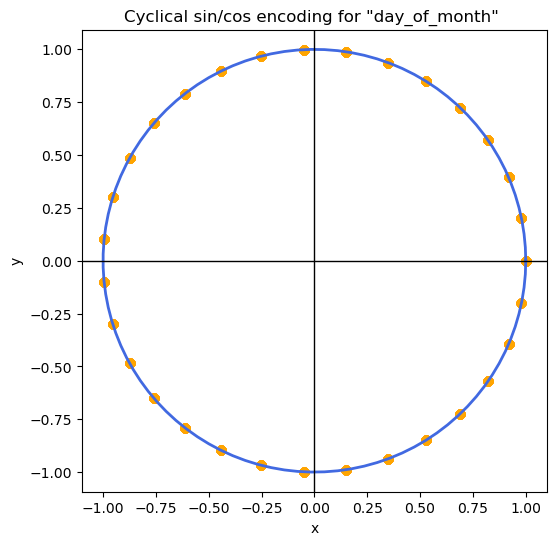

In [34]:
import numpy as np
import matplotlib.pyplot as plt

# Generate a range of angles from 0 to 2pi
angles = np.linspace(0, 2 * np.pi, 100)

# Calculate x and y coordinates of the points on the circle
x = np.cos(angles)
y = np.sin(angles)

# Plot the circle
plt.figure(figsize=(6,6))
plt.plot(x, y, color='royalblue', linewidth=2)

x_coordinates = [val[0] for val in features_df['day_of_month']]
y_coordinates = [val[1] for val in features_df['day_of_month']]
plt.scatter(x_coordinates, y_coordinates, color='orange', marker='o')

# Add horizontal and vertical lines for the axes
plt.axhline(0, color='black', lw=1)
plt.axvline(0, color='black', lw=1)

# Set equal aspect ratio to ensure the circle is not distorted
plt.axis('equal')

# Set the limits of the plot
plt.xlim(-1.1, 1.1)
plt.ylim(-1.1, 1.1)

# Display the plot
plt.title('Cyclical sin/cos encoding for "day_of_month" ')
plt.xlabel('x')
plt.ylabel('y')
plt.show()

In [39]:
# 8. Day of week

def day_of_week(day):
    radians = (day - 1) * (2 * np.pi / 7)
    return [np.cos(radians), np.sin(radians)]

features_df['day_of_week'] = features_df.index.isocalendar().day.map(day_of_week)
features_df

,t_open_y_close,t_high_t_low,t_close_t_open,month_of_year,week_of_year,day_of_year,day_of_month,day_of_week
Date,,,,,,,,
2009-01-02,0.000000,0.021314,0.011013,"[1.0, 0.0]","[1.0, 0.0]","[0.9998520419557735, 0.017201575418260506]","[0.9795299412524945, 0.20129852008866006]","[-0.9009688679024191, -0.433883739117558]"
2009-01-05,-0.007190,0.015715,-0.002853,"[1.0, 0.0]","[0.992708874098054, 0.12053668025532305]","[0.9976335468520451, 0.06875540848113941]","[0.6889669190756866, 0.72479278722912]","[1.0, 0.0]"
2009-01-06,0.005722,0.033963,-0.021663,"[1.0, 0.0]","[0.992708874098054, 0.12053668025532305]","[0.9963032375991965, 0.08590610426133272]","[0.5289640103269624, 0.8486442574947509]","[0.6234898018587336, 0.7818314824680298]"
2009-01-07,-0.010959,0.021710,0.016056,"[1.0, 0.0]","[0.992708874098054, 0.12053668025532305]","[0.9946781061893646, 0.1030313790431788]","[0.3473052528448203, 0.9377521321470804]","[-0.22252093395631434, 0.9749279121818236]"
2009-01-08,-0.002003,0.016158,0.008921,"[1.0, 0.0]","[0.992708874098054, 0.12053668025532305]","[0.9927586335250793, 0.1201261651823505]","[0.1514277775045767, 0.9884683243281114]","[-0.900968867902419, 0.43388373911755823]"
...,...,...,...,...,...,...,...,...
2023-12-22,0.002242,0.007584,0.003441,"[0.8660254037844384, -0.5000000000000004]","[0.9709418174260518, -0.23931566428755865]","[0.9354554315134165, 0.35344467127408763]","[-0.44039415155763423, -0.8978045395707417]","[-0.9009688679024191, -0.433883739117558]"
2023-12-26,-0.004458,0.011195,0.008612,"[0.8660254037844384, -0.5000000000000004]","[0.992708874098054, -0.12053668025532363]","[0.908940487313808, 0.4169258813287287]","[0.3473052528448203, -0.9377521321470804]","[0.6234898018587336, 0.7818314824680298]"
2023-12-27,0.001366,0.006336,0.001194,"[0.8660254037844384, -0.5000000000000004]","[0.992708874098054, -0.12053668025532363]","[0.901634220265486, 0.4324994021339788]","[0.5289640103269624, -0.848644257494751]","[-0.22252093395631434, 0.9749279121818236]"


In [40]:
print(features_df.index.isocalendar().day)

Date
2009-01-02    5
2009-01-05    1
2009-01-06    2
2009-01-07    3
2009-01-08    4
             ..
2023-12-22    5
2023-12-26    2
2023-12-27    3
2023-12-28    4
2023-12-29    5
Name: day, Length: 3774, dtype: UInt32


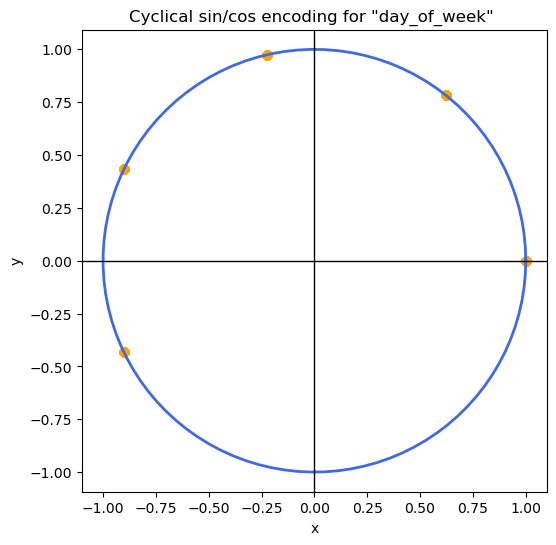

In [41]:
import numpy as np
import matplotlib.pyplot as plt

# Generate a range of angles from 0 to 2pi
angles = np.linspace(0, 2 * np.pi, 100)

# Calculate x and y coordinates of the points on the circle
x = np.cos(angles)
y = np.sin(angles)

# Plot the circle
plt.figure(figsize=(6,6))
plt.plot(x, y, color='royalblue', linewidth=2)

x_coordinates = [val[0] for val in features_df['day_of_week']]
y_coordinates = [val[1] for val in features_df['day_of_week']]
plt.scatter(x_coordinates, y_coordinates, color='orange', marker='o')

# Add horizontal and vertical lines for the axes
plt.axhline(0, color='black', lw=1)
plt.axvline(0, color='black', lw=1)

# Set equal aspect ratio to ensure the circle is not distorted
plt.axis('equal')

# Set the limits of the plot
plt.xlim(-1.1, 1.1)
plt.ylim(-1.1, 1.1)

# Display the plot
plt.title('Cyclical sin/cos encoding for "day_of_week" ')
plt.xlabel('x')
plt.ylabel('y')
plt.show()

In [ ]:
# 9. Hour of day - CURRENTLY: daily resolution on public data - implement later with Energy data

'''
def hour_of_day(hour):
    radians = (hour - 1) * (2 * np.pi / 7)
    return [np.cos(radians), np.sin(radians)]

features_df['hour_of_day'] = features_df.index.hour.map(hour_of_day)
features_df
'''

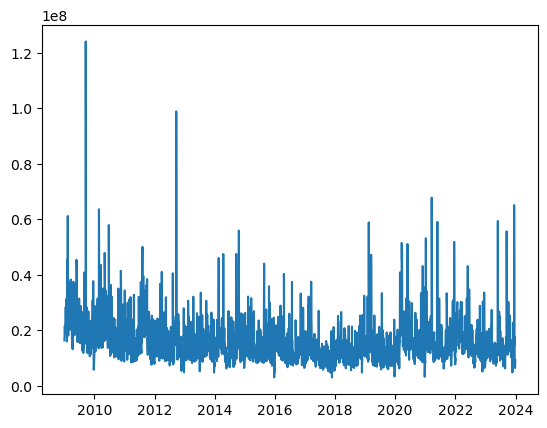

In [45]:
volume = stock_df['Volume']
plt.plot(volume)

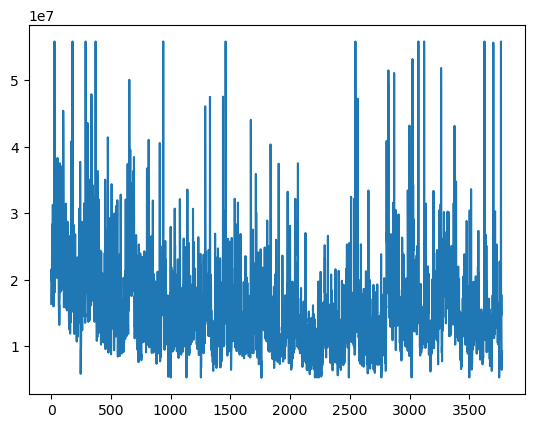

In [46]:
volume_adjusted = adjust_to_three_sigma(volume)
plt.plot(volume_adjusted)

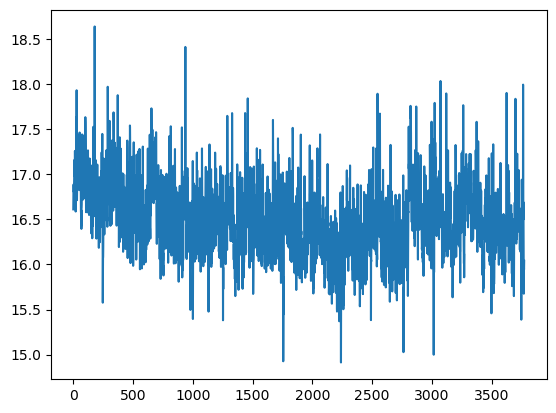

In [47]:
# Use log for volume
log_volume = [np.log(value) for value in stock_df['Volume']]
plt.plot(log_volume)

In [ ]:
# Remove spikes:    Werte, die über 99th percentile hinausgehen, werden auf den 99th percentile Wert gesetzt
#                   Werte, die unter den 99th percentile hinausgehen, werden auf den 99th percentile Wert gesetzt

# Or with three sigma (99.7%)

### Create different time-series (features)